In [1]:
# https://newsapi.org/pricing
# As News API only provides a free subscription plan with 100 requests per day 
# and the pubications requested with free subscription plan are 24 hour old. 
# https://newsapi.org/pricing

In [2]:
import requests
import pandas as pd
from pprint import pprint
from utils import dataframe_table_to_png
pd.set_option('max_colwidth', None) # show all text in a column
pd.set_option('display.max_columns', None) # show all columns

/Users/isaacduong/BMBF_Clustering_Project/BMBFenv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
api_key = "d32a3666e0d046dd88c4e09bc5ae3b68"
lang = "de"
# everything endpoint url
everything_url = f'https://newsapi.org/v2/everything?q=%s&language={lang}&apiKey={api_key}'

search_keywords = [ "BMBF","BMWi","BMU","BMVI","BMEL","BMJV_BLE",\
                    "Bundesministerium für Bildung und Forschung",\
                    "Bundesministerium für Wirtschaft und Technologie",\
                    "Bundesministerium für Umwelt, Naturschutz, nukleare Sicherheit",\
                    "Bundesministerium für Verkehr und Digitale Infrastruktur",\
                    "Bundesministerium für Ernährung und Landwirtschaft",\
                    "Bundesministerium der Justiz und für Verbraucherschutz",\
                  ]

### making test request to examine the structure of the response

In [4]:
response = requests.get(everything_url%"Bundesministerium für Bildung und Forschung")
pprint(response.json())

{'articles': [{'author': 'Miguel de la Riva',
               'content': 'Kurz nach Beginn des Angriffskriegs gegen die '
                          'Ukra\xadine erklärte das Bundesministerium für '
                          'Bildung und Forschung (BMBF), alle laufenden oder '
                          'geplanten Maßnahmen mit Russland würden eingefroren '
                          'und kri… [+947 chars]',
               'description': 'Das Bundesforschungsministerium scheint bei der '
                              'Finanzierung des Teilchenbeschleunigers am GSI '
                              'Helmholtzzentrum in Darmstadt weiter auf '
                              'Russland zu setzen. Auf Nachfragen reagiert es '
                              'ausweichend.',
               'publishedAt': '2023-11-08T10:59:13Z',
               'source': {'id': None, 'name': 'Faz.net'},
               'title': 'Teilchenbeschleuniger FAIR: Leuchtturm der Forschung '
                        'mit Geld aus R

### making request for keywords related to our BMBF Ressort and their full form

In [5]:
responses = dict()
for keyword in search_keywords:
    
    res = requests.get(everything_url%keyword)
    responses[keyword] = res.json()

### create a dataframe from data retrieved 

In [6]:
tup = [(key,art["content"],art["description"],art["title"]) for key in responses for art in responses[key]["articles"]]
newsAPI_enrichment = pd.DataFrame(tup,columns=["keyword","content","description","title"])
newsAPI_enrichment.head(5)

,keyword,content,description,title
0,BMBF,"Das Bundesforschungsministerium (BMBF) hat nun seinen Aktionsplan Künstliche Intelligenz vorgelegt. Seit August dieses Jahres ist bekannt, dass Ministerin Bettina Stark-Watzinger (FDP) 1,6 Milliarden… [+3895 chars]",Wirtschaftliche Erfolge im KI-Bereich sind nach Ansicht der Bundesregierung rar gesät. Das will das Forschungsministerium mit einem Aktionsplan ändern.,Aktionsplan KI: Künstliche Intelligenz soll öfter deutsch werden
1,BMBF,"Kurz nach Beginn des Angriffskriegs gegen die Ukra­ine erklärte das Bundesministerium für Bildung und Forschung (BMBF), alle laufenden oder geplanten Maßnahmen mit Russland würden eingefroren und kri… [+947 chars]",Das Bundesforschungsministerium scheint bei der Finanzierung des Teilchenbeschleunigers am GSI Helmholtzzentrum in Darmstadt weiter auf Russland zu setzen. Auf Nachfragen reagiert es ausweichend.,Teilchenbeschleuniger FAIR: Leuchtturm der Forschung mit Geld aus Russland?
2,BMBF,"Ein großes Ziel, das sich die Politik für das Bildungswesen seit Jahren gesetzt hat, ist die Digitalisierung der Klassenzimmer. Die Schulen sollen auf lange Sicht nicht mehr mit Tafel, Kreide, Papier… [+4070 chars]","Gegen eine bessere digitale Ausstattung für den Unterricht ist im Prinzip nichts einzuwenden. Problematisch aber wird es, wenn am Ende nicht mehr der Bildungserfolg der Schüler zählt, sondern allein die Anzahl der Geräte im Klassenzimmer.",Was bei der Digitalisierung der Schulen schiefläuft
3,BMBF,Nvidia und das deutsche Forschungszentrum Jülich haben die Eckdaten von Jupiter bekannt gegeben: 23.752 GH200 machen den Supercomputer zum schnellsten in Europa. Viel Leistung gibt es nicht nur für K… [+3607 chars],"Nvidia und das deutsche Forschungszentrum Jülich haben die Eckdaten von Jupiter bekannt gegeben: 23.752 GH200 machen den Supercomputer zum schnellsten in Europa. Viel Leistung gibt es nicht nur für Künstliche Intelligenz (AI), die ExaFLOPs-Marke fällt auch fü…",Deutsches Exascale-System Jupiter: 23.752 GH200 ergeben Europas schnellsten Supercomputer
4,BMBF,"Vor allem psychische Erkrankungen nehmen unter Studierenden zu, zeigt eine neue Studie. Die Hochschulen sind darauf schlecht vorbereitet.\r\nCorona hat deutliche Spuren bei den Studierenden hinterlasse… [+3967 chars]","Vor allem psychische Erkrankungen nehmen unter Studierenden zu, zeigt eine neue Studie. Die Hochschulen sind darauf schlecht vorbereitet.","Barrieren im Studium: Hohe Belastungen, wenig Beratung"


In [7]:
newsAPI_enrichment["keyword"].value_counts()

keyword
BMU                                                               35
Bundesministerium für Bildung und Forschung                       32
BMBF                                                              19
Bundesministerium für Ernährung und Landwirtschaft                12
BMEL                                                               8
Bundesministerium für Wirtschaft und Technologie                   8
BMWi                                                               3
Bundesministerium für Verkehr und Digitale Infrastruktur           3
Bundesministerium für Umwelt, Naturschutz, nukleare Sicherheit     2
Name: count, dtype: int64

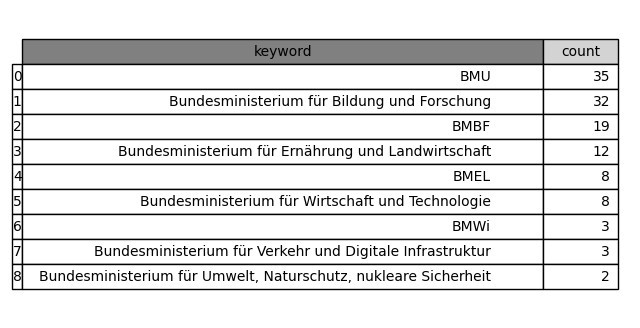

In [8]:
dataframe_table_to_png(pd.DataFrame(newsAPI_enrichment["keyword"].value_counts()),"../eda/newsAPI everything pubs contain keywords","search_keywords",[0.7,0.1])

In [9]:
newsAPI_enrichment.shape

(122, 4)

In [10]:
newsAPI_enrichment["total_content"] =  newsAPI_enrichment["content"] \
                                    + newsAPI_enrichment["description"] \
                                    + newsAPI_enrichment["title"]

In [11]:
BMBF = pd.read_csv("../data/cleanedBMBF.csv")

## check whether the titles of data fetched and BMBF grant topics are overlapped

In [12]:
len(set(BMBF["Thema"]).intersection(set(newsAPI_enrichment["title"])))

0

## traverse through every FKZ to determine which one is mentioned in the NewsAPI data retrieved

In [13]:
def check_overlapping_value():
    FKZs_found = []
    for Res in BMBF["Ressort"].unique():
        for FKZ in BMBF.loc[BMBF["Ressort"]==Res,"FKZ"]:
            if FKZ in " ".join(newsAPI_enrichment["total_content"]):
                FKZs_found.append(FKZ)
            else: continue
                
    return FKZs_found
            
print(len(check_overlapping_value()))

0


### the top-headlines endpoint does not find any publication/ press release associated with our search keywords, too.

In [14]:
# top-headlines endpoint url
headlines_url= f"https://newsapi.org/v2/top-headlines?q=%s&apiKey={api_key}"
headlines_responses = dict()
for keyword in search_keywords:
    
    res = requests.get(headlines_url%keyword)
    headlines_responses[keyword] = res.json()

pd.DataFrame().from_dict(headlines_responses)

,BMBF,BMWi,BMU,BMVI,BMEL,BMJV_BLE,Bundesministerium für Bildung und Forschung,Bundesministerium für Wirtschaft und Technologie,"Bundesministerium für Umwelt, Naturschutz, nukleare Sicherheit",Bundesministerium für Verkehr und Digitale Infrastruktur,Bundesministerium für Ernährung und Landwirtschaft,Bundesministerium der Justiz und für Verbraucherschutz
status,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
totalResults,0,0,0,0,0,0,0,0,0,0,0,0
articles,[],[],[],[],[],[],[],[],[],[],[],[]


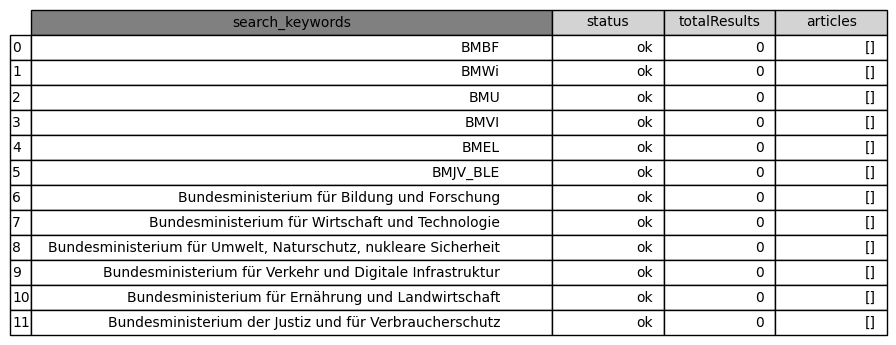

In [15]:
# save dataframe as image
dataframe_table_to_png(pd.DataFrame().from_dict(headlines_responses).transpose(),"../eda/newsAPI top-headlines","search_keywords",[0.7,0.15,0.15,0.15])

## In the data provided by NewsAPI, there is no overlap in either the titles or grant identifiers. Conclusion: NewsAPI with its free subscription is not suitable for enriching data for our BMBF dataset 